# 오토인코더(Autoencoder)의 이해와 구현

## 1. 오토인코더 개요

### 1.1 오토인코더란 무엇인가?

- 오토인코더(Autoencoder)는 입력 데이터를 효율적으로 압축(인코딩)하고, 이 압축된 표현에서 원본 입력을 재구성(디코딩)하도록 설계된 신경망 아키텍처입니다.

- 비지도 학습 방법의 하나로, 레이블이 없는 데이터에서 중요한 특징을 추출하고 잠재 변수를 학습합니다.

- 이때 학습된 잠재 공간(latent space)은 원본 입력의 가장 중요한 정보만을 포함합니다.


<img src='https://pebpung.github.io/assets/img/2021-09-11/AutoEncoder-1/Untitled.png'>

### 1.2 오토인코더와 인코더-디코더 모델 비교

- 모든 오토인코더는 인코더와 디코더를 포함하지만, 모든 인코더-디코더 모델이 오토인코더인 것은 아닙니다.

- 일반적인 인코더-디코더 모델은 입력과 출력이 다를 수 있으며, 기계 번역, 이미지 캡셔닝 등 다양한 작업에 활용됩니다.

- 반면, 오토인코더는 입력 데이터를 자체 재구성하는 데 초점을 맞추며, 비지도 학습으로 훈련됩니다.

## 2. 오토인코더의 이론적 개념

### 2.1 잠재 변수와 잠재 공간

- 잠재 변수(latent variables): 직접 관찰할 수 없지만 데이터의 생성 과정에 영향을 미치는 숨겨진 변수들입니다.
- 잠재 공간(latent space): 잠재 변수들이 구성하는 공간으로, 데이터의 중요한 특징을 저차원으로 표현합니다.

<img src='https://velog.velcdn.com/images/hyeda/post/cef78295-1a18-43c9-9cb6-90a89a7673cf/image.png'>

### 2.2 오토인코더의 작동 원리

오토인코더는 입력 데이터를 인코더를 통해 잠재 공간으로 압축하고, 디코더를 통해 다시 원본 입력으로 복원합니다. 이 과정에서 인코더는 데이터의 중요한 특징만을 추출하도록 학습되며, 디코더는 이 특징을 바탕으로 원본 데이터를 재구성합니다.

- 인코더(Encoder): 입력 데이터를 저차원 잠재 벡터로 변환 $z=f(x)$.
- 디코더(Decoder): 잠재 벡터를 원본 차원으로 복원 $\hat x =g(z)$.
- 목표: 재구성된 출력 $\hat x$가 원본 입력 $x$와 최대한 유사하도록 하는 것.

### 2.3 디코더(Decoder)
- 잠재 벡터를 원본 차원으로 복원하는 역할을 합니다.
- 수학적 표현: x' = g(z) 여기서 x'는 복원된 데이터입니다.
- 인코더의 역과정을 수행하며, 역시 여러 층의 신경망으로 구성됩니다.

### 2.3 손실 함수와 최적화

오토인코더의 학습 목표는 재구성 손실을 최소화하는 것입니다. 일반적으로 사용하는 손실 함수는 다음과 같습니다.

평균 제곱 오차(MSE):

<img src='https://blog.kakaocdn.net/dn/AH9yx/btrDdm0gUG3/GGdkr97wQbBDEbWC5rksf1/img.png'>

교차 엔트로피(Cross-Entropy): 이진 또는 다중 클래스 데이터에 사용.
최적화는 역전파와 경사 하강법을 통해 수행됩니다.



## 3. 오토인코더의 다양한 유형

### 3.1 언더컴플릿(Undercomplete) 오토인코더

- 정의: 잠재 공간의 차원이 입력 차원보다 작은 오토인코더.
- 목적: 정보 병목 현상을 통해 데이터의 중요한 특징만 학습.
- 한계: 단순한 복사 기능을 학습하는 것을 방지하지만, 복잡한 데이터에는 한계가 있음.

<img src='https://wikidocs.net/images/page/193829/Fig_02_01.png'>

### 3.2 정규화된 오토인코더

스파스(Sparse) 오토인코더
- 정의: 숨겨진 레이어의 노드 수는 입력보다 크지만, 활성화되는 노드 수를 제한.
- 방법: 희소성 제약을 손실 함수에 추가하여 과적합 방지.
- 장점: 중요한 특징을 더 잘 학습하고, 과적합을 줄임.

<img src='https://wikidocs.net/images/page/193829/Fig_02_02.png'>

수축(Contractive) 오토인코더
- 정의: 입력 변화에 민감하지 않도록 정규화 항을 추가.
- 방법: 야코비안 행렬의 프로베니우스 노름을 손실 함수에 추가.
- 장점: 노이즈에 강인한 표현 학습.

<img src='https://miro.medium.com/v2/resize:fit:1612/1*UW2Gb8g-DlcOeeIlJxeWUQ.png'>

노이즈 제거(Denoising) 오토인코더
- 정의: 노이즈가 추가된 입력에서 원본 데이터를 복원하도록 학습.
- 방법: 입력 데이터에 노이즈를 추가하고, 원본 데이터를 출력하도록 훈련.
- 장점: 노이즈 제거 능력 및 일반화 성능 향상.

<img src='https://wikidocs.net/images/page/193827/Fig_01_04.png'>


## 4. Fashion MNIST 데이터셋을 활용한 오토인코더 구현

### 4.1 데이터셋 소개와 전처리

- Fashion MNIST: 28x28 픽셀의 의류 이미지로 구성된 데이터셋.
- 클래스 수: 10개.
- 데이터 수량: 학습용 60,000개, 테스트용 10,000개.
- 전처리:
    - 정규화: 픽셀 값을 [−1,1] 범위로 변환.
    - 텐서 변환: 이미지를 PyTorch 텐서로 변환.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 재현성을 위한 시드 설정
torch.manual_seed(42)

# 데이터 전처리 정의
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 픽셀 값을 [-1, 1] 범위로 정규화
])

# Fashion MNIST 데이터셋 로드
train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# 데이터로더 생성
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.4MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 228kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 4.20MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.3MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



### 4.2 모델 아키텍처 설계

- 인코더
    - 입력층: 입력 이미지를 펼쳐서 784차원 (28x28 이미지 펼침)벡터로 변환합니다.
    - 은닉층: 256차원 → 128차원 → 64차원.
    - 활성화 함수: ReLU.
    - nn.Linear()로 ReLU 활성화 함수를 사용하여 잠재 공간으로 인코딩합니다.

- 디코더
    - 입력층: 64차원.
    - 은닉층: 128차원 → 256차원 → 784차원.
    - 활성화 함수: ReLU, 최종 출력에 Tanh 사용.
    - 잠재 벡터를 입력으로 받아 nn.Linear()와 ReLU를 하는 과정을 통해 이미지를 복원하고, 최종 출력은 Tanh 함수를 통해 [−1,1]로 정규화하는 과정을 거친 뒤, **Unflatten**을 사용하여 벡터를 이미지 형태로 변환합니다.

In [ ]:
# 오토인코더 모델 정의
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=64):
        super(Autoencoder, self).__init__()

        # 인코더 정의
        self.encoder = nn.Sequential(
            nn.Flatten(),                # 이미지 펼치기 (28x28 → 784)
            nn.Linear(784, 256),         # 784 → 256
            nn.ReLU(True),
            nn.Linear(256, 128),         # 256 → 128
            nn.ReLU(True),
            nn.Linear(128, latent_dim),  # 128 → 64
        )

        # 디코더 정의
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),  # 64 → 128
            nn.ReLU(True),
            nn.Linear(128, 256),         # 128 → 256
            nn.ReLU(True),
            nn.Linear(256, 784),         # 256 → 784
            nn.Tanh(),                   # 출력 값을 [-1, 1] 범위로 맞춤
            nn.Unflatten(dim=1, unflattened_size=(1, 28, 28))  # 784 → 1x28x28 이미지로 변환
        )

    def forward(self, x):
        encoded = self.encoder(x)  # 인코더를 통해 잠재 벡터 획득
        decoded = self.decoder(encoded)  # 디코더를 통해 원본 이미지 복원
        return decoded

### 4.3 모델 학습 함수

- 손실 함수로 MSELoss를 사용하여 재구성 오류를 계산합니다.
- 옵티마이저로 Adam을 사용하여 모델 파라미터를 업데이트합니다.

In [ ]:
# 모델 학습 함수 정의
def train_model(model, train_loader, num_epochs, device):
    model = model.to(device)
    criterion = nn.MSELoss()  # 손실 함수로 평균 제곱 오차 사용
    optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Adam 옵티마이저 사용

    train_losses = []

    for epoch in range(num_epochs):
        model.train()  # 모델을 학습 모드로 설정
        total_loss = 0
        for data, _ in train_loader:
            data = data.to(device)

            # 순전파
            output = model(data)
            loss = criterion(output, data)  # 입력과 출력 간의 차이 계산

            # 역전파 및 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')

    return train_losses


### 4.4 모델 테스트 및 결과 시각화

- visualize_results 함수로 테스트 데이터에서 원본 이미지와 재구성된 이미지를 시각화합니다.


In [ ]:
# 모델 테스트 및 결과 시각화 함수 정의
def visualize_results(model, test_loader, device, num_images=5):
    model.eval()  # 모델을 평가 모드로 설정
    with torch.no_grad():
        data, _ = next(iter(test_loader))
        data = data[:num_images].to(device)

        # 모델을 통해 재구성된 이미지 얻기
        reconstructed = model(data)

        # 시각화
        plt.figure(figsize=(10, 4))
        for i in range(num_images):
            # 원본 이미지
            plt.subplot(2, num_images, i + 1)
            plt.imshow(data[i].cpu().numpy().squeeze(), cmap='gray')
            plt.title('Original')
            plt.axis('off')

            # 재구성된 이미지
            plt.subplot(2, num_images, i + num_images + 1)
            plt.imshow(reconstructed[i].cpu().numpy().squeeze(), cmap='gray')
            plt.title('Reconstructed')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

Epoch [1/10], Loss: 0.109966
Epoch [2/10], Loss: 0.061539
Epoch [3/10], Loss: 0.052610
Epoch [4/10], Loss: 0.047480
Epoch [5/10], Loss: 0.044034
Epoch [6/10], Loss: 0.041564
Epoch [7/10], Loss: 0.039719
Epoch [8/10], Loss: 0.038172
Epoch [9/10], Loss: 0.036934
Epoch [10/10], Loss: 0.035897


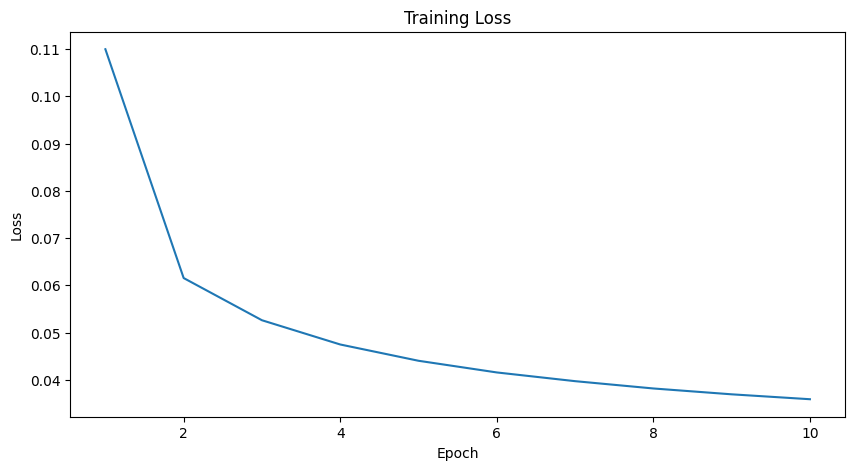

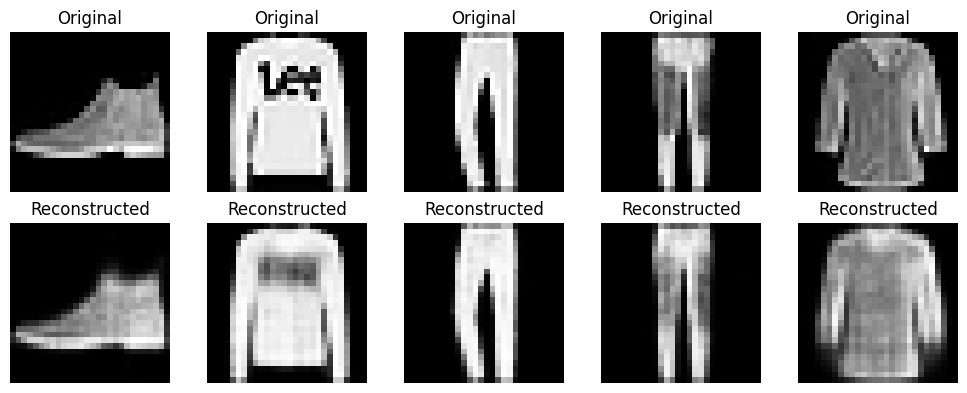

In [ ]:
# device에 gpu 할당
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# 모델 초기화
model = Autoencoder(latent_dim=64)

# 모델 학습
num_epochs = 10
train_losses = train_model(model, train_loader, num_epochs, device)

In [ ]:
# 학습 손실 곡선 시각화
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 테스트 데이터로 결과 시각화
visualize_results(model, test_loader, device)

### 실습 / 탐구

여러분들이 보시기에는 기존의 이미지와 새롭게 만들어진 이미지가 어떤 차이점이 있다고 생각하시나요?

그렇다면, latent_dim 값을 변경하여 모델의 재구성 성능이 어떻게 변하는지 관찰해보시고, 결과를 노션 페이지에 공유해주세요.

또한, 하단에 오토인코더의 응용분야가 있긴 하지만, 그 외로는 어떻게 활용 되고 있는지 알아보시고, 노션 페이지에 공유해주세요.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 재현성을 위한 시드 설정
torch.manual_seed(42)

# 데이터 전처리 정의
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 픽셀 값을 [-1, 1] 범위로 정규화
])

# Fashion MNIST 데이터셋 로드
train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# 데이터로더 생성
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.81MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 168kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.27MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.68MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# 오토인코더 모델 정의
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=64):
        super(Autoencoder, self).__init__()

        # 인코더 정의
        self.encoder = nn.Sequential(
            nn.Flatten(),                # 이미지 펼치기 (28x28 → 784)
            nn.Linear(784, 512),         # 784 → 256
            nn.ReLU(True),
            nn.Linear(512, 256),         # 784 → 256
            nn.ReLU(True),
            nn.Linear(256, 128),         # 256 → 128
            nn.ReLU(True),
            nn.Linear(128, 64),  # 128 → 64
            nn.ReLU(True),
            nn.Linear(64, latent_dim),  # 128 → 64
        )

        # 디코더 정의
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),  # 64 → 128
            nn.ReLU(True),
            nn.Linear(64, 128),         # 128 → 256
            nn.ReLU(True),
            nn.Linear(128, 256),         # 128 → 256
            nn.ReLU(True),
            nn.Linear(256, 512),         # 128 → 256
            nn.ReLU(True),
            nn.Linear(512, 784),         # 256 → 784
            nn.Tanh(),                   # 출력 값을 [-1, 1] 범위로 맞춤
            nn.Unflatten(dim=1, unflattened_size=(1, 28, 28))  # 784 → 1x28x28 이미지로 변환
        )

    def forward(self, x):
        encoded = self.encoder(x)  # 인코더를 통해 잠재 벡터 획득
        decoded = self.decoder(encoded)  # 디코더를 통해 원본 이미지 복원
        return decoded

In [2]:
from
# 모델 학습 함수 정의
def train_model(model, train_loader, num_epochs, device):
    model = model.to(device)
    criterion = nn.MSELoss()  # 손실 함수로 평균 제곱 오차 사용
    optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Adam 옵티마이저 사용

    train_losses = []

    for epoch in range(num_epochs):
        model.train()  # 모델을 학습 모드로 설정
        total_loss = 0
        for data, _ in train_loader:
            data = data.to(device)

            # 순전파
            output = model(data)
            loss = criterion(output, data)  # 입력과 출력 간의 차이 계산

            # 역전파 및 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')

    return train_losses


In [3]:
# 모델 테스트 및 결과 시각화 함수 정의
def visualize_results(model, test_loader, device, num_images=5):
    model.eval()  # 모델을 평가 모드로 설정
    with torch.no_grad():
        data, _ = next(iter(test_loader))
        data = data[:num_images].to(device)

        # 모델을 통해 재구성된 이미지 얻기
        reconstructed = model(data)

        # 시각화
        plt.figure(figsize=(10, 4))
        for i in range(num_images):
            # 원본 이미지
            plt.subplot(2, num_images, i + 1)
            plt.imshow(data[i].cpu().numpy().squeeze(), cmap='gray')
            plt.title('Original')
            plt.axis('off')

            # 재구성된 이미지
            plt.subplot(2, num_images, i + num_images + 1)
            plt.imshow(reconstructed[i].cpu().numpy().squeeze(), cmap='gray')
            plt.title('Reconstructed')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

In [ ]:
# device에 gpu 할당
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# 모델 초기화
model = Autoencoder(latent_dim=64)

# 모델 학습
num_epochs = 50
train_losses = train_model(model, train_loader, num_epochs, device)

cuda
Epoch [1/50], Loss: 0.152444
Epoch [2/50], Loss: 0.081697
Epoch [3/50], Loss: 0.073265
Epoch [4/50], Loss: 0.066306
Epoch [5/50], Loss: 0.062128
Epoch [6/50], Loss: 0.059661
Epoch [7/50], Loss: 0.057623
Epoch [8/50], Loss: 0.055628
Epoch [9/50], Loss: 0.054104
Epoch [10/50], Loss: 0.052956
Epoch [11/50], Loss: 0.051836
Epoch [12/50], Loss: 0.050675
Epoch [13/50], Loss: 0.049509
Epoch [14/50], Loss: 0.048547
Epoch [15/50], Loss: 0.047560
Epoch [16/50], Loss: 0.046792
Epoch [17/50], Loss: 0.046265
Epoch [18/50], Loss: 0.045543
Epoch [19/50], Loss: 0.044955
Epoch [20/50], Loss: 0.044500
Epoch [21/50], Loss: 0.043950
Epoch [22/50], Loss: 0.043494
Epoch [23/50], Loss: 0.043068
Epoch [24/50], Loss: 0.042500
Epoch [25/50], Loss: 0.042099
Epoch [26/50], Loss: 0.041795
Epoch [27/50], Loss: 0.041310
Epoch [28/50], Loss: 0.040842
Epoch [29/50], Loss: 0.040567
Epoch [30/50], Loss: 0.040262
Epoch [31/50], Loss: 0.039991
Epoch [32/50], Loss: 0.039608
Epoch [33/50], Loss: 0.039504
Epoch [34/50],

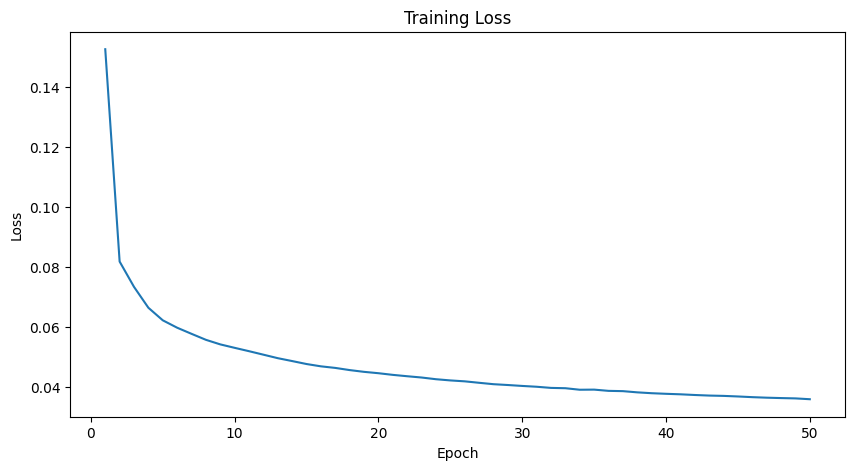

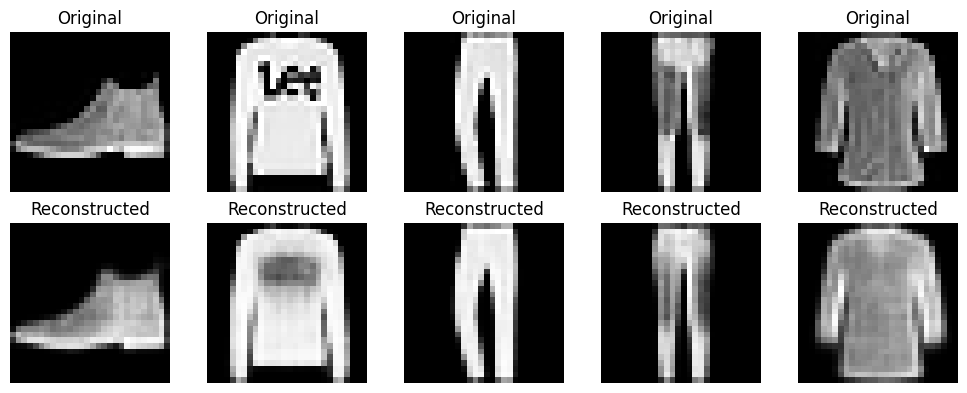

In [ ]:
# 학습 손실 곡선 시각화
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 테스트 데이터로 결과 시각화
visualize_results(model, test_loader, device)

In [13]:
## Convolution을 활용한 AutoEncoder
import torch
import torch.nn as nn

class ConvAutoencoder(nn.Module):
    def __init__(self, latent_dim=64):
        super(ConvAutoencoder, self).__init__()

        def CBR(in_channels, out_channels):
            layers = [
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
            ]
            return nn.Sequential(*layers)

        # Contracting path
        # (H - K + 2P) / S + 1
        self.enc1 = nn.Sequential(CBR(1, 64), CBR(64, 64)) # (28 - 3 + 2) / 1 + 1 = 28
        self.pool1 = nn.MaxPool2d(2) # (28 - 2 + 0)/2 + 1 = 14

        self.enc2 = nn.Sequential(CBR(64, 128), CBR(128, 128)) # (14 - 3 + 2) /1 + 1 = 14
        self.pool2 = nn.MaxPool2d(2) # (14 - 2 + 0) / 2 + 1 = 7

        # self.enc3 = nn.Sequential(CBR(128, 256), CBR(256, 256)) # (7 - 3 + 2) / 1 + 1= 7
        # self.pool3 = nn.MaxPool2d(2) # (7 - 2 + 0) / 2 + 1 = 3

        # self.enc4 = nn.Sequential(CBR(256, 512), CBR(512, 512)) # (3 - 3 + 2) / 1 + 1 = 3
        # self.pool4 = nn.MaxPool2d(2) # (3 - 2 + 0) / 2 + 1 = 1

        # self.center = CBR(512, 1024) # (1 - 3 + 2) / 1 + 1 = 1
        self.center = CBR(128, 256) # (1 - 3 + 2) / 1 + 1 = 1

        # Expansive path
        # (H - 1) * S - 2P + K
        # self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)  # (1 - 1) * 2 - 2 * 0 + 2 = 2
        # self.dec4 = nn.Sequential(CBR(512, 512), CBR(512, 512)) #

        # self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2) # (2 - 1) * 2 - 2*0 + 2 = 4
        # self.dec3 = nn.Sequential(CBR(256, 256), CBR(256, 256))

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2) # (4 - 1) * 2 -2*0 + 2 = 8
        self.dec2 = nn.Sequential(CBR(128, 128), CBR(128, 128))

        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2) # (8 - 1) * 2 - 2*0 +2 = 16
        self.dec1 = nn.Sequential(CBR(64, 64), CBR(64, 64))

        # (16 - 1) * 2 - 2P + 3
        # (16 - 1) * 2 - 2P + K
        # self.final = nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2, padding=2)
        self.final = nn.Conv2d(64, 1, kernel_size=1, stride=1, padding=0)

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        pool1 = self.pool1(enc1)

        enc2 = self.enc2(pool1)
        pool2 = self.pool2(enc2)

        # enc3 = self.enc3(pool2)
        # pool3 = self.pool3(enc3)

        # enc4 = self.enc4(pool3)
        # pool4 = self.pool4(enc4)

        # Center
        # center = self.center(pool4)
        center = self.center(pool2)

        # Decoder
        # up4 = self.up4(center)
        # dec4 = self.dec4(up4)

        # up3 = self.up3(dec4)
        # dec3 = self.dec3(up3)

        # up2 = self.up2(dec3)
        up2 = self.up2(center)
        dec2 = self.dec2(up2)

        up1 = self.up1(dec2)
        dec1 = self.dec1(up1)

        out = self.final(dec1)
        return out



In [14]:
import torchsummary

model = ConvAutoencoder()

torchsummary.summary(model.cuda(), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
       BatchNorm2d-2           [-1, 64, 28, 28]             128
              ReLU-3           [-1, 64, 28, 28]               0
            Conv2d-4           [-1, 64, 28, 28]          36,928
       BatchNorm2d-5           [-1, 64, 28, 28]             128
              ReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]          73,856
       BatchNorm2d-9          [-1, 128, 14, 14]             256
             ReLU-10          [-1, 128, 14, 14]               0
           Conv2d-11          [-1, 128, 14, 14]         147,584
      BatchNorm2d-12          [-1, 128, 14, 14]             256
             ReLU-13          [-1, 128, 14, 14]               0
        MaxPool2d-14            [-1, 12

In [15]:
# device에 gpu 할당
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# 모델 초기화
model = ConvAutoencoder(latent_dim=64)

# 모델 학습
num_epochs = 50
train_losses = train_model(model, train_loader, num_epochs, device)

cuda
Epoch [1/50], Loss: 0.029713
Epoch [2/50], Loss: 0.009911
Epoch [3/50], Loss: 0.007263
Epoch [4/50], Loss: 0.005900
Epoch [5/50], Loss: 0.005012
Epoch [6/50], Loss: 0.004548
Epoch [7/50], Loss: 0.004070
Epoch [8/50], Loss: 0.003783
Epoch [9/50], Loss: 0.003519
Epoch [10/50], Loss: 0.003187
Epoch [11/50], Loss: 0.003042
Epoch [12/50], Loss: 0.002847
Epoch [13/50], Loss: 0.002659
Epoch [14/50], Loss: 0.002508
Epoch [15/50], Loss: 0.002346
Epoch [16/50], Loss: 0.002353
Epoch [17/50], Loss: 0.002087
Epoch [18/50], Loss: 0.002036
Epoch [19/50], Loss: 0.001962
Epoch [20/50], Loss: 0.001802
Epoch [21/50], Loss: 0.001778
Epoch [22/50], Loss: 0.001698
Epoch [23/50], Loss: 0.001678
Epoch [24/50], Loss: 0.001542
Epoch [25/50], Loss: 0.001576
Epoch [26/50], Loss: 0.001479
Epoch [27/50], Loss: 0.001423
Epoch [28/50], Loss: 0.001374
Epoch [29/50], Loss: 0.001378
Epoch [30/50], Loss: 0.001344
Epoch [31/50], Loss: 0.001306
Epoch [32/50], Loss: 0.001284
Epoch [33/50], Loss: 0.001249
Epoch [34/50],

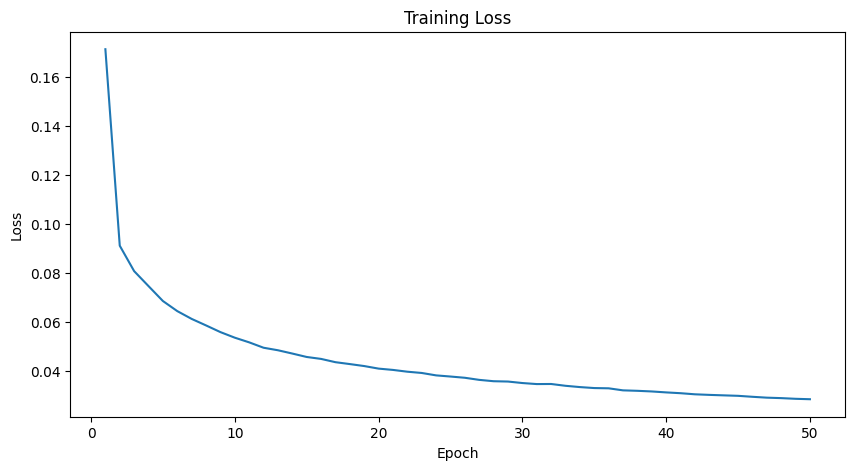

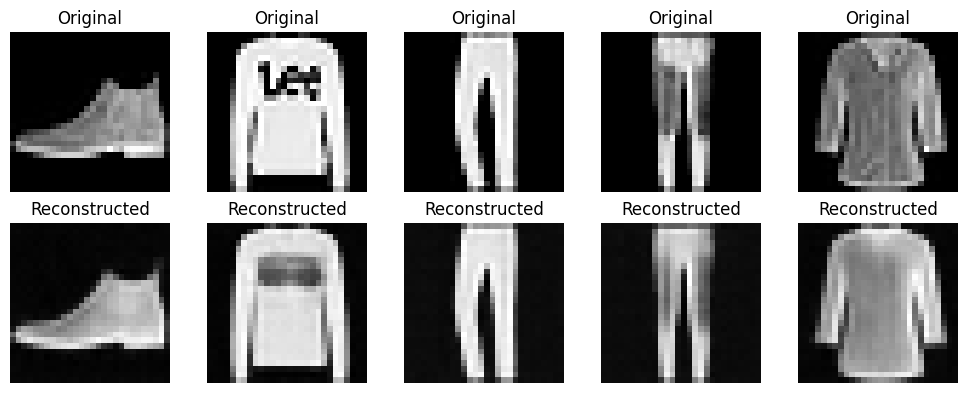

In [7]:
# 학습 손실 곡선 시각화
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 테스트 데이터로 결과 시각화
visualize_results(model, test_loader, device)

## 5. 오토인코더의 응용 분야

### 5.1 데이터 압축과 차원 축소
- 오토인코더는 데이터의 중요한 특징을 저차원 잠재 공간에 압축하여 표현합니다.
- 이는 데이터 압축 및 시각화, 차원 축소 기법으로 활용될 수 있습니다.

### 5.2 이상 감지 및 얼굴 인식
- 정상 데이터의 패턴을 학습하여 이상치를 탐지할 수 있습니다.
- 얼굴 인식에서 개인의 특징을 추출하고 비교하는 데 활용됩니다.

### 5.3 노이즈 제거와 이미지 복원
- 노이즈 제거 오토인코더는 손상된 이미지나 신호에서 노이즈를 제거합니다.
- 이미지의 누락된 부분을 복원하거나 해상도를 향상시키는 데 사용됩니다.

### 5.4 생성 모델로의 활용
- 변이형 오토인코더(VAE)는 새로운 데이터를 생성하는 능력을 갖추고 있습니다.
- 이미지 생성, 시계열 데이터 생성 등 다양한 생성 작업에 활용됩니다.